In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv("./datasets/P3_Weather.csv")
import os
os.stat("./datasets/P3_Weather.csv")

In [ ]:
df.head()

In [ ]:
print("max MaxTemp: ",df['MaxTemp'].max())
print("min MaxTemp: ",df['MaxTemp'].min())
print("max MinTemp: ",df['MinTemp'].max())
print("min MinTemp: ",df['MinTemp'].min())

Columns retained: Precip, MinTemp, MeanTemp, Snowfall and MaxTemp


In [37]:
colms = ['Precip','MinTemp','MeanTemp','Snowfall','MaxTemp']
df = df[colms]
df.head()

,Precip,MinTemp,MeanTemp,Snowfall,MaxTemp
0,1.016,22.222222,23.888889,0,25.555556
1,0,21.666667,25.555556,0,28.888889
2,2.54,22.222222,24.444444,0,26.111111
3,2.54,22.222222,24.444444,0,26.666667
4,0,21.666667,24.444444,0,26.666667


In [38]:
df.dtypes

Precip       object
MinTemp     float64
MeanTemp    float64
Snowfall     object
MaxTemp     float64
dtype: object

In [39]:
#Precip and Snowfall converted to numeric values
df['Precip']=pd.to_numeric(df['Precip'],errors='coerce')
df['Snowfall']=pd.to_numeric(df['Snowfall'],errors='coerce')


In [59]:
df.shape,df.isnull().sum()

((119040, 5), 5)

[Text(0.5, 0, 'MaxTemp range')]

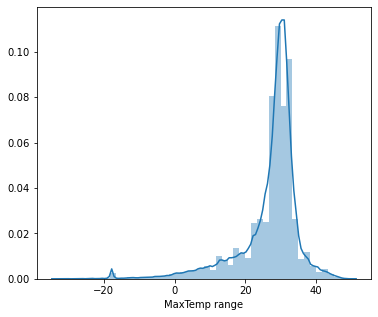

In [41]:
plt.figure(figsize=(6,5))
pl = sns.distplot(df['MaxTemp'])
pl.set(xlabel = "MaxTemp range")

[Text(0.5, 0, 'Precipitation range')]

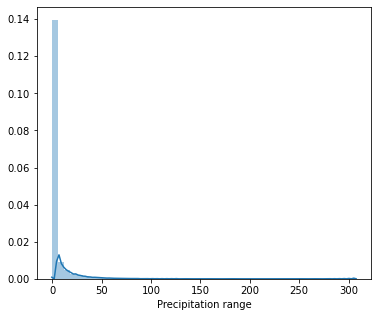

In [42]:
plt.figure(figsize=(6,5))
pl = sns.distplot(df['Precip'])
pl.set(xlabel = "Precipitation range")

C:\Users\SVM\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Snowfall range')]

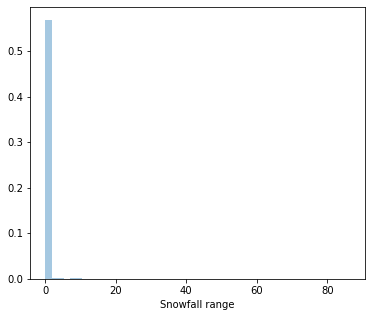

In [43]:
plt.figure(figsize=(6,5))
pl = sns.distplot(df['Snowfall'])
pl.set(xlabel = "Snowfall range")

In [ ]:
#filling missing values of snowfall and precip with 0 
df['Snowfall'] = df['Snowfall'].fillna(0)
df['Precip'] = df['Precip'].fillna(0)
df.isnull().sum() #no missing values now

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = df.corr()
print(corr)

            Precip   MinTemp  MeanTemp  Snowfall   MaxTemp
Precip    1.000000  0.088455  0.047061 -0.011043  0.004457
MinTemp   0.088455  1.000000  0.965425 -0.307854  0.878384
MeanTemp  0.047061  0.965425  1.000000 -0.323671  0.969048
Snowfall -0.011043 -0.307854 -0.323671  1.000000 -0.322013
MaxTemp   0.004457  0.878384  0.969048 -0.322013  1.000000


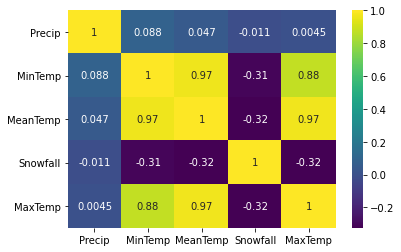

In [46]:
sn.heatmap(corr, annot=True,cmap='viridis')
plt.show()

# Simple linear regression

In [47]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1) #considering maxtemp as dependent variable


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=regressor.predict(X_test)

In [51]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.92033997]]
[10.66185201]


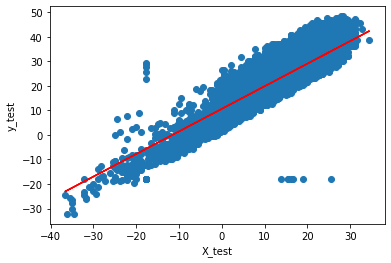

In [52]:
plt.scatter(X_test,y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test,y_pred,color='red')
plt.show()

In [53]:
import math
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error : ",rmse)
print("Mean Absolute Error : ",mae)

Root Mean Squared Error :  4.198996082109204
Mean Absolute Error :  3.19932917837853


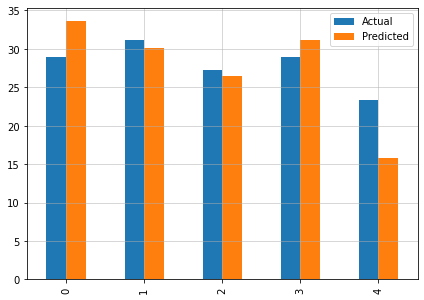

In [54]:
df_new=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df1=df_new.head(5)
df1.plot(kind='bar',figsize=(7,5))

plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()

#  Multiple Linear Regression

In [55]:
df.columns

Index(['Precip', 'MinTemp', 'MeanTemp', 'Snowfall', 'MaxTemp'], dtype='object')

In [ ]:
X = df[['Precip','MinTemp','MeanTemp','Snowfall']] # here we have 4 variables for multiple regression
Y = df['MaxTemp']
 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
import math
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error : ",rmse)
print("Mean Absolute Error : ",mae)

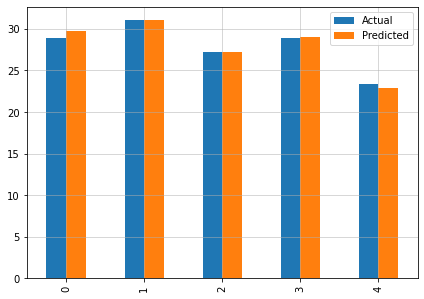

In [58]:

df_new2=pd.DataFrame({'Actual':y_test.values.flatten(),'Predicted':y_pred.flatten()})
df1=df_new2.head(5)
df1.plot(kind='bar',figsize=(7,5))

plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()